In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(0)

# Import data

In [2]:
df_raw = pd.read_csv("./Data/PhiladelphiaLandTemperatures.csv")
df_raw

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1743-11-01,6.072,1.740,Philadelphia,United States,39.38N,74.91W
1,1743-12-01,NaN,NaN,Philadelphia,United States,39.38N,74.91W
2,1744-01-01,NaN,NaN,Philadelphia,United States,39.38N,74.91W
3,1744-02-01,NaN,NaN,Philadelphia,United States,39.38N,74.91W
4,1744-03-01,NaN,NaN,Philadelphia,United States,39.38N,74.91W
...,...,...,...,...,...,...,...
3234,2013-05-01,16.638,0.184,Philadelphia,United States,39.38N,74.91W
3235,2013-06-01,22.213,0.236,Philadelphia,United States,39.38N,74.91W
3236,2013-07-01,25.683,0.233,Philadelphia,United States,39.38N,74.91W
3237,2013-08-01,22.477,0.381,Philadelphia,United States,39.38N,74.91W


In [23]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3239 entries, 0 to 3238
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   dt                             3239 non-null   object 
 1   AverageTemperature             3119 non-null   float64
 2   AverageTemperatureUncertainty  3119 non-null   float64
 3   City                           3239 non-null   object 
 4   Country                        3239 non-null   object 
 5   Latitude                       3239 non-null   object 
 6   Longitude                      3239 non-null   object 
dtypes: float64(2), object(5)
memory usage: 177.3+ KB


## `load_data()`

In [3]:
def load_data(filepath):
    df = (pd.read_csv(filepath)
          .dropna() # Remove rows with missing values
          .iloc[1:, :] # First row has a temp. but skips the sequence; that far back not useful
          .reset_index(drop=True)
          .rename(columns={"dt": "date", 
                           "AverageTemperature": "avg_temp", 
                           "AverageTemperatureUncertainty": "avg_temp_uncertainty", # May be interesting to plot avg. temp +/- uncertainty
                           }
          )
    )
    
    df['date'] = pd.to_datetime(df['date'])

    cols_sel = ['date', 'avg_temp', 'avg_temp_uncertainty']
    
    return df.loc[:, cols_sel]

In [4]:
df = load_data("./Data/PhiladelphiaLandTemperatures.csv")
df

,date,avg_temp,avg_temp_uncertainty
0,1744-04-01,11.672,2.088
1,1744-05-01,16.907,1.586
2,1744-06-01,22.366,1.531
3,1744-07-01,23.642,1.371
4,1744-09-01,17.153,1.533
...,...,...,...
3113,2013-05-01,16.638,0.184
3114,2013-06-01,22.213,0.236
3115,2013-07-01,25.683,0.233
3116,2013-08-01,22.477,0.381


## `get_slice()`

In [5]:
def get_slice(df_inp, start_date, end_date):

    slice = df_inp[(df_inp["date"] >= start_date) & (df["date"] <= end_date)]

    return slice

In [6]:
df_slice = get_slice(df, "1980-01-01", "1982-12-31")
df_slice

,date,avg_temp,avg_temp_uncertainty
2713,1980-01-01,0.759,0.337
2714,1980-02-01,-0.678,0.442
2715,1980-03-01,4.608,0.337
2716,1980-04-01,11.776,0.287
2717,1980-05-01,17.719,0.323
2718,1980-06-01,20.301,0.214
2719,1980-07-01,24.782,0.463
2720,1980-08-01,24.976,0.347
2721,1980-09-01,21.434,0.321
2722,1980-10-01,12.609,0.237


## `train_test_split()`

In [7]:
def train_test_split(df_slice_inp, train_size):
    train = (df_slice_inp.iloc[:train_size, :]["avg_temp"]
             .to_numpy()
             .reshape(-1, 1)
             )
    test = (df_slice_inp.iloc[train_size:, :]["avg_temp"]
            .to_numpy()
            .reshape(-1, 1)
    )

    return train, test

In [8]:
X, y = train_test_split(df_slice, 24)
X.shape, y.shape

((24, 1), (12, 1))

In [67]:
X

array([[ 0.759],
       [-0.678],
       [ 4.608],
       [11.776],
       [17.719],
       [20.301],
       [24.782],
       [24.976],
       [21.434],
       [12.609],
       [ 6.665],
       [ 1.106],
       [-2.854],
       [ 3.606],
       [ 4.779],
       [12.519],
       [16.228],
       [22.059],
       [24.541],
       [22.446],
       [19.227],
       [11.901],
       [ 7.762],
       [ 1.743]])

# Train RNN - Tanh

In [21]:
def make_RNN(X_inp, fcl_size, output_size, act_func="tanh"):

    from Layers.InputLayer import InputLayer
    from Layers.FullyConnectedLayer import FullyConnectedLayer
    from Layers.TanhLayer import TanhLayer
    from Layers.ReLULayer import ReLULayer
    from Layers.LinearLayer import LinearLayer
    from LossFunctions.SquaredError import SquaredError

    IL = InputLayer(X_inp)
    FCLU = FullyConnectedLayer(X_inp.shape[1], fcl_size)
    if act_func == "relu":
        ACT1 = ReLULayer()
    else:
        ACT1 = TanhLayer()

    ACT1 = TanhLayer()
    FCLW = FullyConnectedLayer(fcl_size, fcl_size,)
    FCLV = FullyConnectedLayer(fcl_size, output_size)
    ACT2 = LinearLayer()
    SE = SquaredError()

    model = {"IL": IL, "FCLU": FCLU, "ACT1": ACT1, "FCLW": FCLW, "FCLV": FCLV, "ACT2": ACT2, "SE": SE}

    return model

In [22]:
rnn = make_RNN(X_inp = X, fcl_size=10, output_size=y.shape[0])
rnn["FCLU"].getWeights()

array([[ 9.76270079e-06,  4.30378733e-05,  2.05526752e-05,
         8.97663660e-06, -1.52690401e-05,  2.91788226e-05,
        -1.24825577e-05,  7.83546002e-05,  9.27325521e-05,
        -2.33116962e-05]])

In [24]:
rnn["FCLV"].getWeights().shape

(10, 12)

## `train_RNN_inplace()`

In [25]:
def train_RNN_inplace(model, X, y, learning_rate, epochs):

    training_dict = {"epoch": list(range(epochs)),
                     "squared_error": [],
                     "y_preds": [],}

    for epoch in range(epochs):
        # Forward
        for t in range(len(X)):
            IL_out = model["IL"].forward(X[t])
            if t > 0:
                FCLU_out = model["FCLU"].forward_with_feedback(IL_out, model["FCLW"].getPrevOut()[t-1])
            else:
                FCLU_out = model["FCLU"].forward(IL_out)
            ACT1_out = model["ACT1"].forward(FCLU_out)
            FCLW_out = model["FCLW"].forward(ACT1_out)
            FCLV_out = model["FCLV"].forward(ACT1_out)
            ACT2_out = model["ACT2"].forward(FCLV_out)

        # Predictions and Loss
        # training_dict["y_preds"].append(ACT2_out.reshape(y.shape))
        training_dict["y_preds"].append(ACT2_out)

        error = model["SE"].eval(y, ACT2_out.reshape(y.shape))
        training_dict["squared_error"].append(error)

        # Backward
        dhNext_dW = np.zeros((1, model["FCLV"].getWeights().shape[0])) # Same shape as what FCLV.backward(grad) is...
        
        for t in range(len(X)-1, -1, -1):
            grad = model["SE"].gradient(y, model["ACT2"].getPrevOut()[-1].reshape(y.shape)).reshape(1, -1)
            grad = model["ACT2"].backward(grad, t_inp=t)

            model["FCLV"].updateWeightsGradAccum(grad, t_inp=t)
            model["FCLV"].updateBiasesGradAccum(grad)

            grad = model["FCLV"].backward(grad) + dhNext_dW
            # if t == len(X)-1:
                # print(f"FCLV gradient shape is: {grad.shape}") # Verify gradient shape
            grad = model["ACT1"].backward(grad, t_inp=t)

            if t > 0:
                model["FCLW"].updateWeightsGradAccum(grad, t_inp=t-1) # Have to use t-1
                model["FCLW"].updateBiasesGradAccum(grad)

            model["FCLU"].updateWeightsGradAccum(grad, t_inp=t)
            model["FCLU"].updateBiasesGradAccum(grad)

            dhNext_dW = model["FCLW"].backward(grad)

        # Update weights   
        model["FCLU"].updateWeights(grad, eta=learning_rate)
        model["FCLV"].updateWeights(grad, eta=learning_rate)
        model["FCLW"].updateWeights(grad, eta=learning_rate)

    return pd.DataFrame(training_dict)

## Train model (1980-1981 --> 1982)

In [26]:
lr = 0.0001
rnn = make_RNN(X_inp = X, fcl_size=20, output_size=y.shape[0]) # Have to reinitialize
training_results = train_RNN_inplace(rnn, X, y, learning_rate=lr, epochs=60)
training_results

,epoch,squared_error,y_preds
0,0,214.107960,"[[-7.775819531609381e-05, -8.209568471390394e-..."
1,1,212.057456,"[[-0.015658194187688573, 0.0095102328224762, 0..."
2,2,207.995771,"[[-0.046744281979346755, 0.028501428164832025,..."
3,3,202.000794,"[[-0.0931868149758803, 0.0568742186864855, 0.1..."
4,4,194.187489,"[[-0.1547628857835997, 0.09449241928428234, 0...."
5,5,184.705690,"[[-0.23117696368202179, 0.14117547600946073, 0..."
6,6,173.737221,"[[-0.3220623221140786, 0.196699338455966, 0.54..."
7,7,161.492416,"[[-0.4269828084947864, 0.2607975413408725, 0.7..."
8,8,148.206080,"[[-0.545434946877548, 0.33316248948847255, 0.9..."
9,9,134.132991,"[[-0.6768503623565872, 0.41344693941373195, 1...."


## Plot errors
* NOTE: Epoch with 0 error will be overfit - stop earlier than that

<AxesSubplot: xlabel='epoch'>

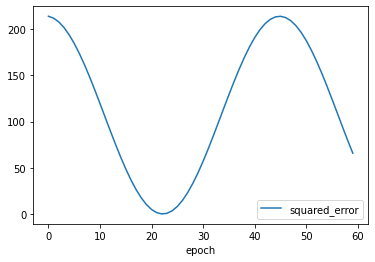

In [27]:
training_results.plot(x="epoch", y="squared_error")

## Plot Predictions
* TODO: Make a function for plotting, give a gradient of colors from Red to Purple


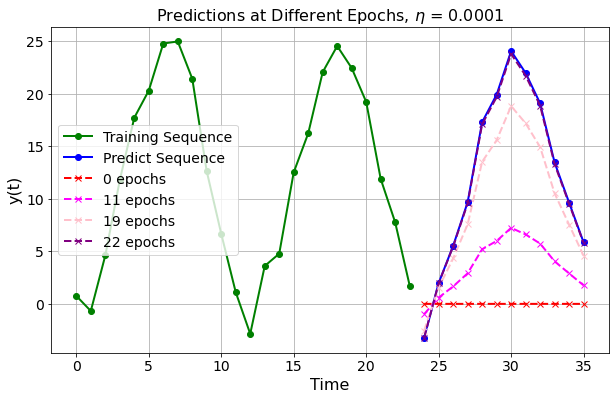

In [28]:
graph_index_lst = [0, 11, 19, 22]
colors = ["red", "magenta", "purple"]
y_preds_graph = training_results["y_preds"].loc[graph_index_lst].to_numpy()

fig, ax = plt.subplots(figsize=(10, 6))
t_vals_x = np.arange(len(X))
t_vals_y = np.arange(len(X), len(X)+len(y))

ax.plot(t_vals_x, X.flatten(), color="green", linestyle="solid", label="Training Sequence", linewidth=2, marker="o")
ax.plot(t_vals_y, y.flatten(), color="blue", linestyle="solid", label="Predict Sequence", linewidth=2, marker="o")

colors = ["red", "magenta", "pink", "purple"]
for ind, y_pred_seq, color in zip(graph_index_lst, y_preds_graph, colors):
    ax.plot(t_vals_y, y_pred_seq.flatten(), color = color, linestyle="dashed", label=f"{ind} epochs", linewidth=2, marker="x")


ax.set_xlabel("Time", fontsize=16)
ax.set_ylabel("y(t)", fontsize=16)
ax.set_title(f"Predictions at Different Epochs, $\eta$ = {lr}", 
             fontsize=16)
ax.tick_params(axis="x", labelsize=14)
ax.tick_params(axis="y", labelsize=14)
ax.legend(fontsize=14)
ax.grid()
plt.show()

# Validation Set (1983-1984 --> 1985)

## Train to right number of epochs

In [52]:
lr = 0.0001
num_epochs = 22
rnn = make_RNN(X_inp = X, fcl_size=22, output_size=y.shape[0]) # Have to reinitialize
training_results = train_RNN_inplace(rnn, X, y, learning_rate=lr, epochs=num_epochs)
# training_results

In [53]:
df_slice_val = get_slice(df, "1983-01-01", "1985-12-31")
df_slice_val

,date,avg_temp,avg_temp_uncertainty
2749,1983-01-01,1.543,0.379
2750,1983-02-01,1.783,0.431
2751,1983-03-01,6.958,0.186
2752,1983-04-01,10.420,0.416
2753,1983-05-01,15.631,0.194
2754,1983-06-01,21.387,0.268
2755,1983-07-01,25.098,0.297
2756,1983-08-01,24.399,0.233
2757,1983-09-01,20.439,0.166
2758,1983-10-01,13.897,0.326


### `predict()`

In [48]:
def predict(model, X_inp, y_inp):
    for t in range(len(X_inp)):
        IL_out = model["IL"].forward(X_inp[t])
        if t > 0:
            FCLU_out = model["FCLU"].forward_with_feedback(IL_out, model["FCLW"].getPrevOut()[t-1])
        else:
            FCLU_out = model["FCLU"].forward(IL_out)
        ACT1_out = model["ACT1"].forward(FCLU_out)
        FCLW_out = model["FCLW"].forward(ACT1_out)
        FCLV_out = model["FCLV"].forward(ACT1_out)
        ACT2_out = model["ACT2"].forward(FCLV_out)



    y_pred = ACT2_out
    error = model["SE"].eval(y_inp, y_pred.reshape(y_inp.shape))
    rmse = np.sqrt(error)

    return y_pred, rmse

In [58]:
y_pred_train, rmse_train = predict(rnn, X, y)
rmse_train

0.1697757551139586

In [54]:
X_val, y_val = train_test_split(df_slice_val, 24)

y_pred_val, rmse_val = predict(rnn, X_val, y_val)
rmse_val

2.047366269841368

### `graph_val_pred()`

In [90]:
def graph_val_pred(X_inp, y_inp, y_pred_inp, RMSE_inp, year_start):
    fig, ax = plt.subplots(figsize=(10, 6))
    t_vals_x = np.arange(len(X_inp))
    t_vals_y = np.arange(len(X_inp), len(X_inp)+len(y_inp))

    ax.plot(t_vals_x, X.flatten(), color="green", linestyle="solid", label="Training Sequence", linewidth=2, marker="o")
    ax.plot(t_vals_y, y.flatten(), color="blue", linestyle="solid", label="Predict Sequence", linewidth=2, marker="o")


    ax.plot(t_vals_y, y_pred_inp.flatten(), color = "magenta", linestyle="dashed", label=f"Model Predictions", linewidth=2, marker="x")


    ax.set_xlabel("Time", fontsize=16)
    ax.set_ylabel("T(t)", fontsize=16)
    ax.set_title(f"Predictions for Validation Set {year_start+2} from {year_start}-{year_start+1}, RMSE={RMSE_inp:.2f}", 
                fontsize=16)
    ax.tick_params(axis="x", labelsize=14)
    ax.tick_params(axis="y", labelsize=14)
    ax.legend(fontsize=14)
    ax.grid()
    # plt.show()

    return fig

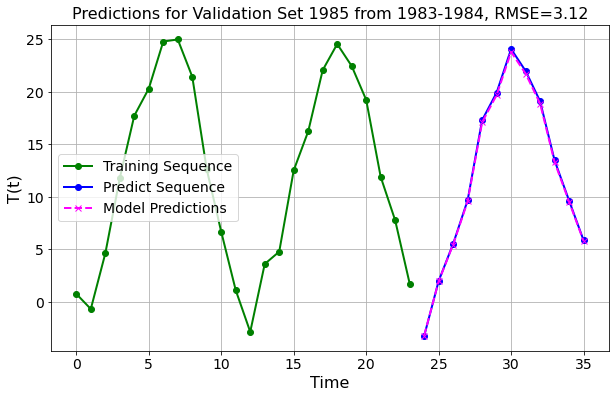

In [91]:
foo = graph_val_pred(X_val, y_val, y_pred_val, rmse_val, 1983)

## Evaluate on multiple validation sets

RMSE for 1983 is: 2.05
RMSE for 1984 is: 1.79
RMSE for 1985 is: 1.82
RMSE for 1986 is: 1.81
RMSE for 1987 is: 3.48
RMSE for 1988 is: 2.88
RMSE for 1989 is: 2.36
RMSE for 1990 is: 1.91
RMSE for 1991 is: 2.57
RMSE for 1992 is: 1.82
RMSE for 1993 is: 3.07
RMSE for 1994 is: 1.96
RMSE for 1995 is: 1.86
RMSE for 1996 is: 2.96
RMSE for 1997 is: 2.23
RMSE for 1998 is: 2.56
RMSE for 1999 is: 1.84
RMSE for 2000 is: 3.16
RMSE for 2001 is: 1.79
RMSE for 2002 is: 1.57
RMSE for 2003 is: 2.55
RMSE for 2004 is: 2.78
RMSE for 2005 is: 2.98
RMSE for 2006 is: 2.39
RMSE for 2007 is: 1.62
RMSE for 2008 is: 3.12
RMSE for 2009 is: 1.96


<ipython-input-90-342407e12d0f>:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots(figsize=(10, 6))


RMSE for 2010 is: 3.12


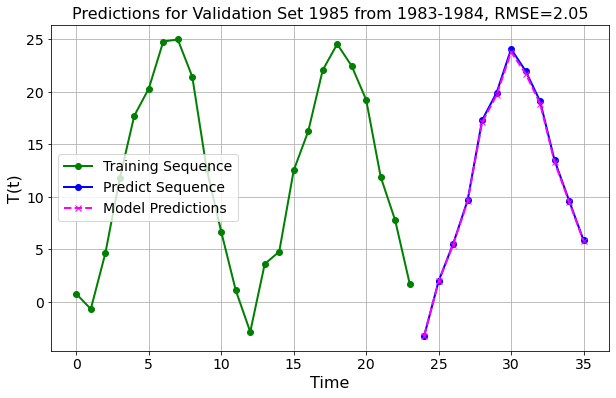

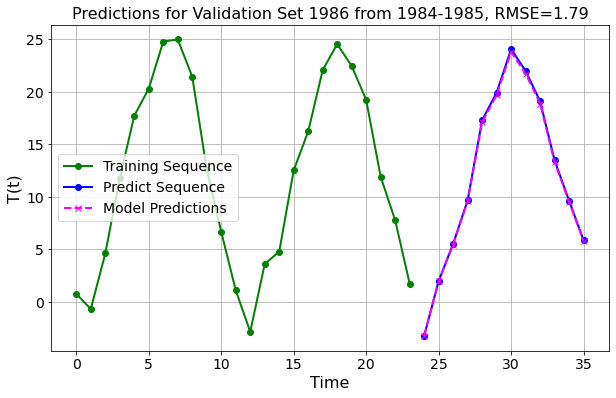

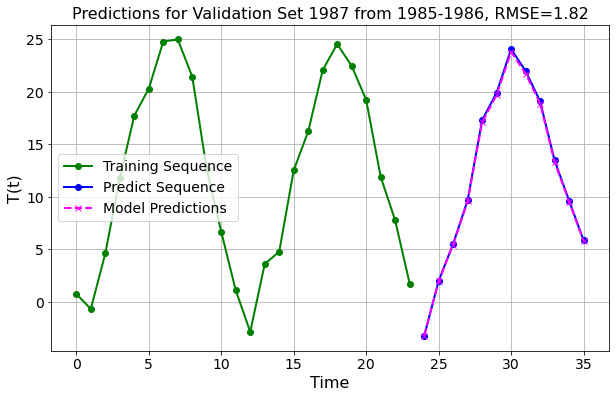

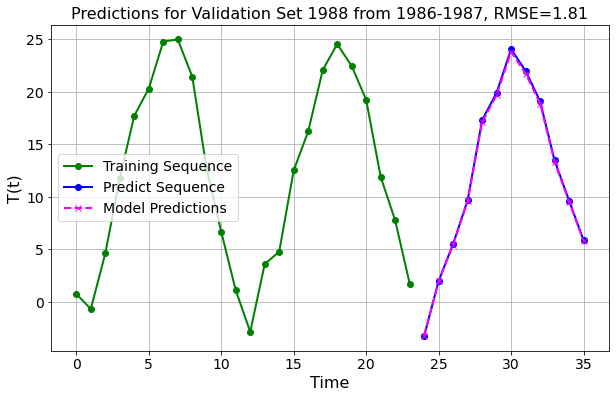

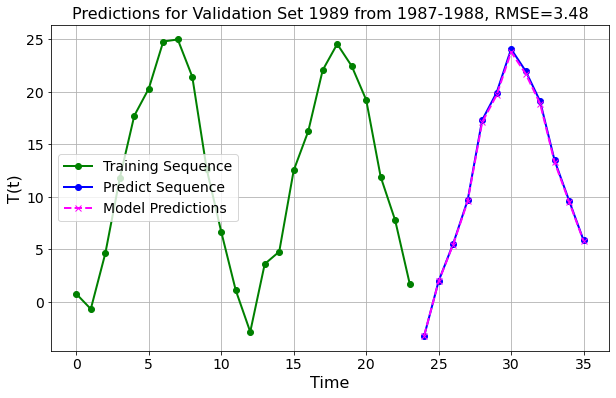

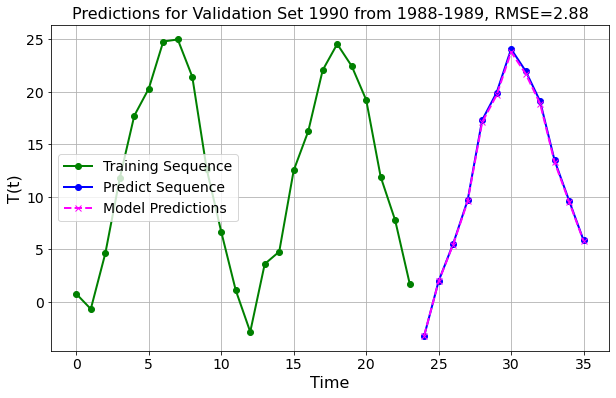

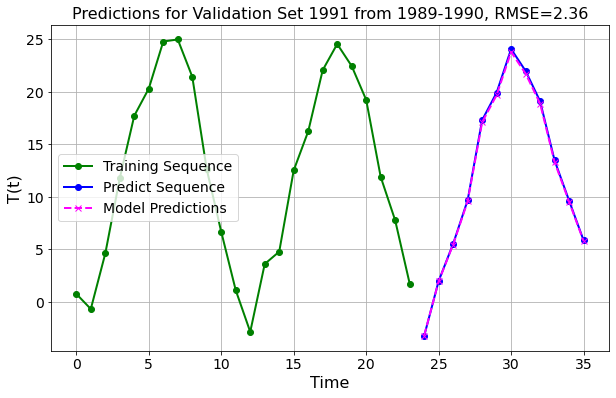

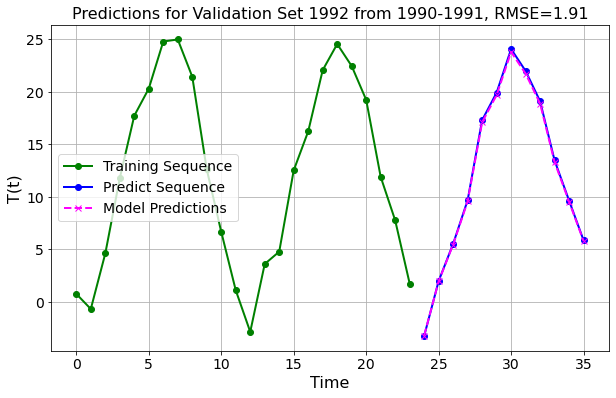

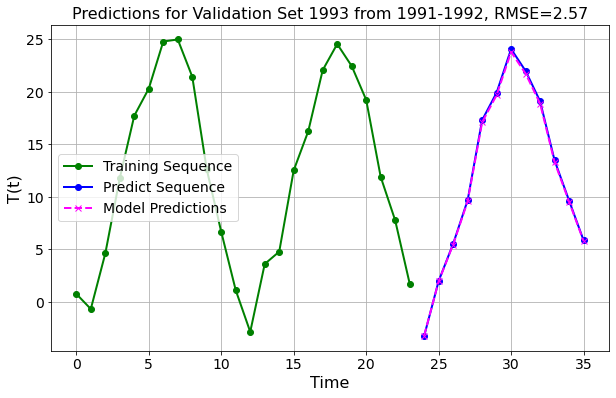

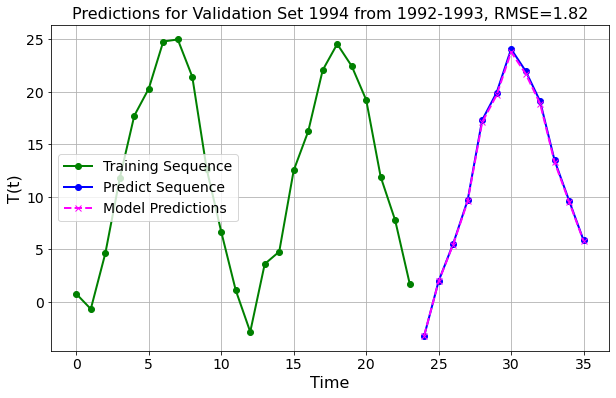

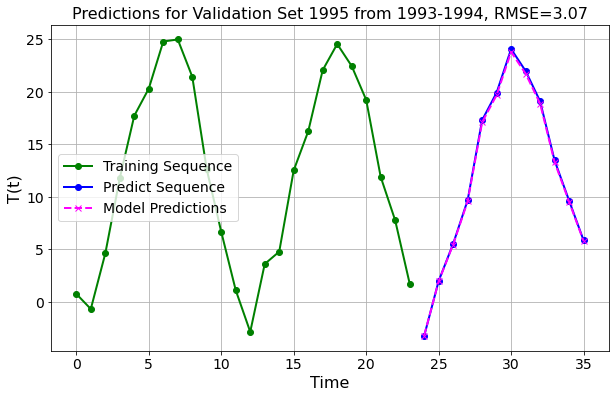

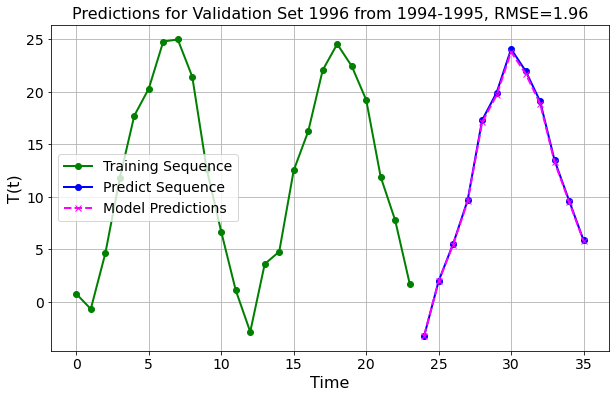

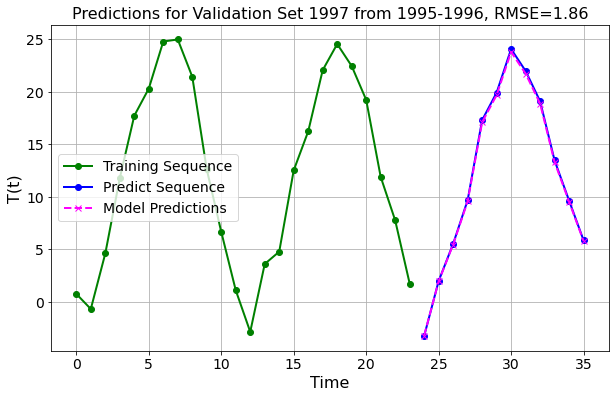

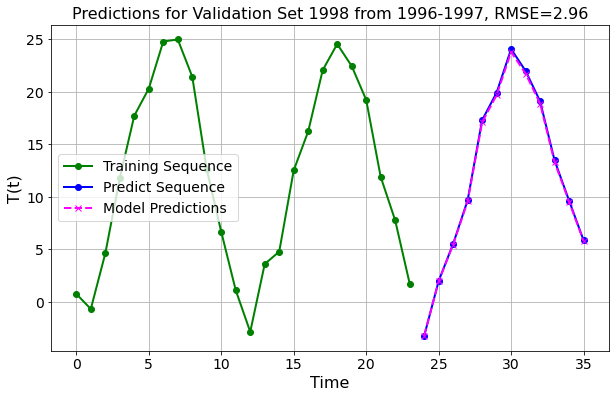

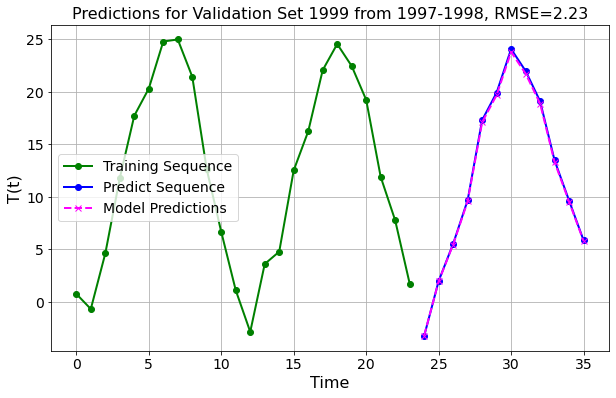

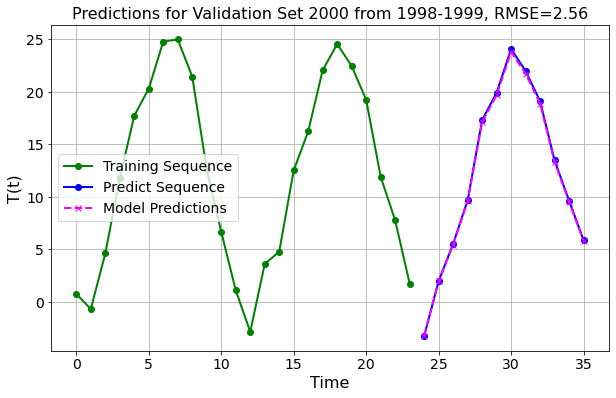

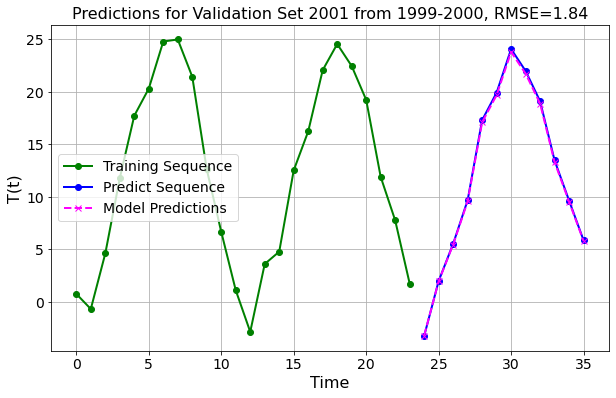

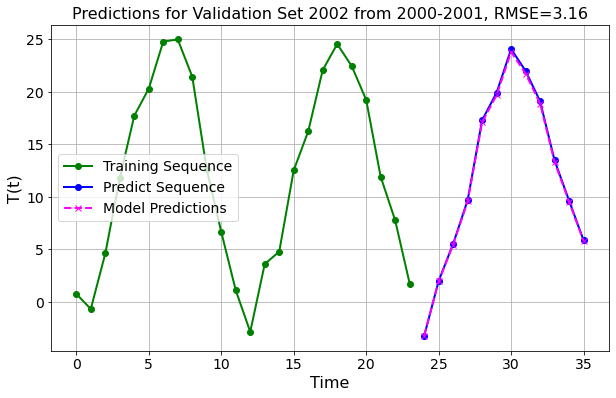

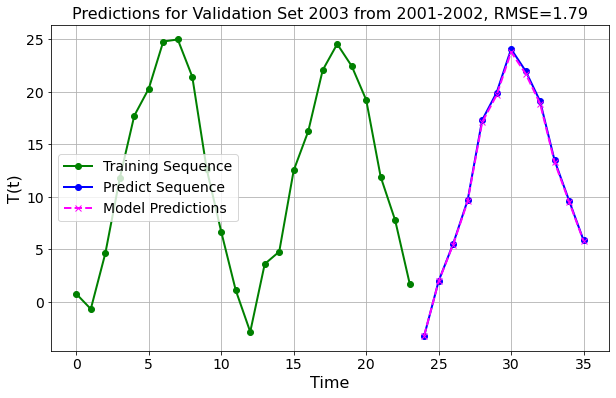

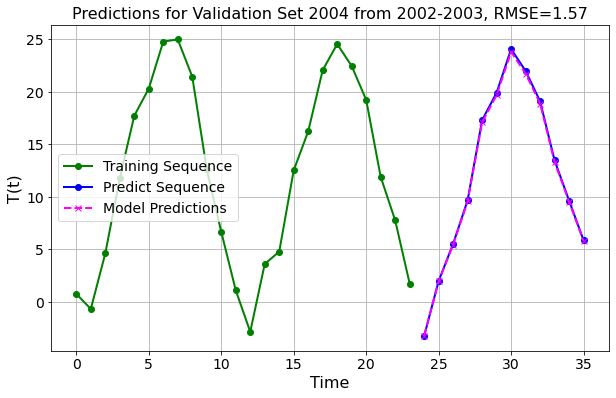

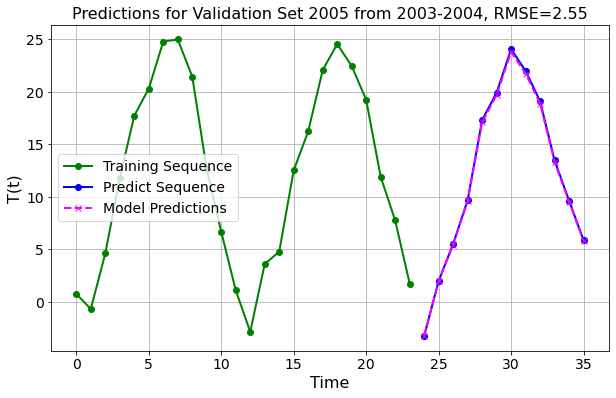

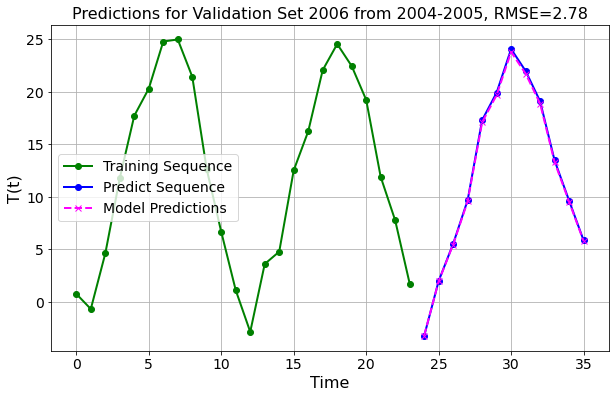

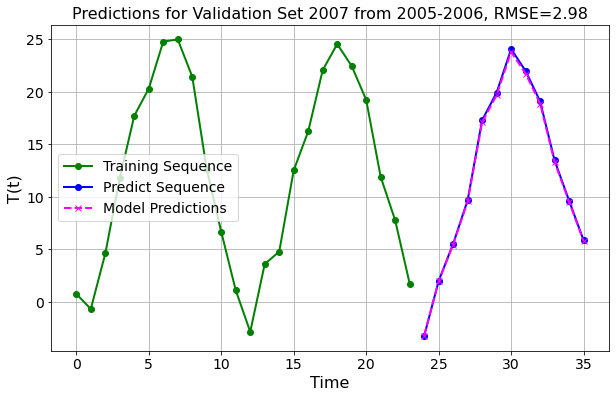

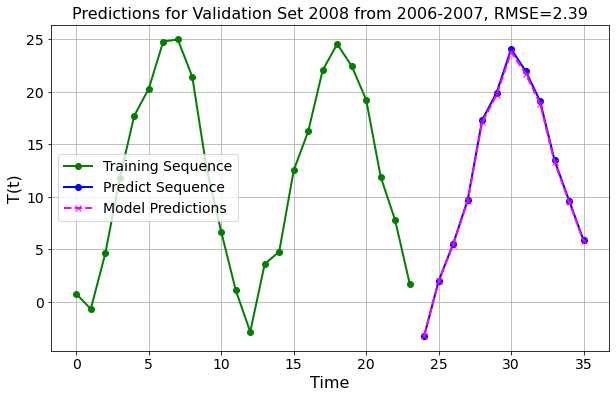

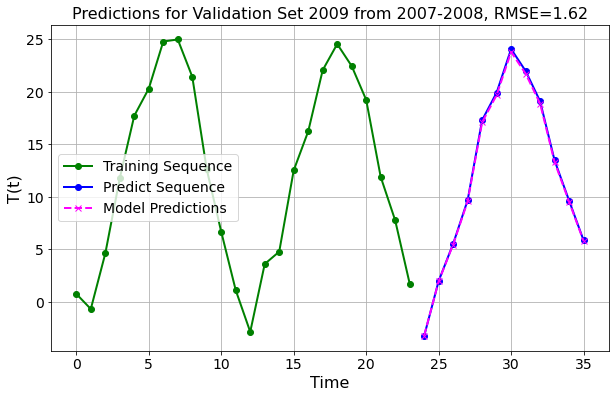

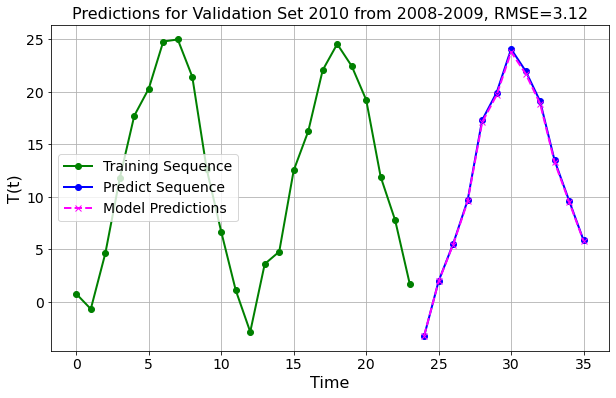

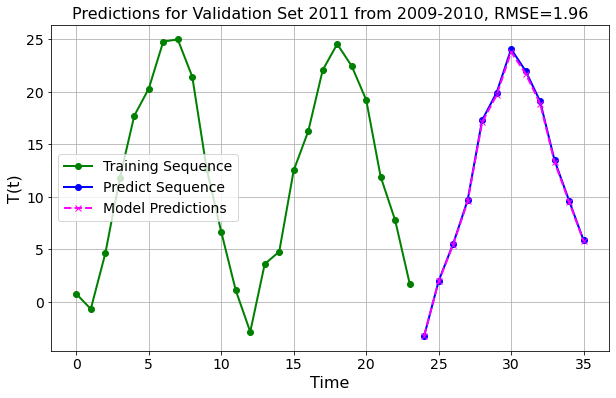

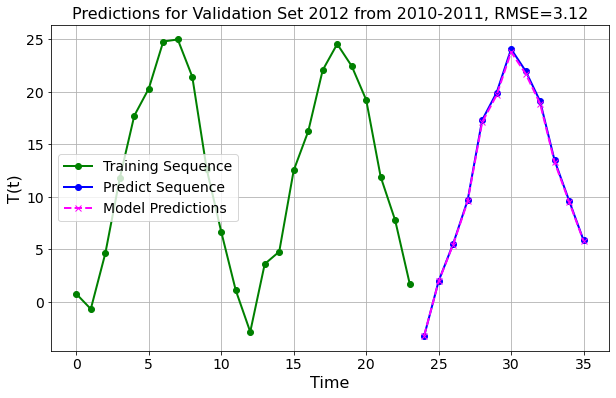

In [93]:
val_testing_dict = {"input_range": [], 
                    "predict_range": [], 
                    "rmse": []}

fig_lst = []

for year in range(1983, 2011):
    
    
    val_testing_dict["input_range"].append(f"{year} - {year+1}")
    val_testing_dict["predict_range"].append(f"{year+2}")
    
    df_slice_val = get_slice(df, f"{year}-01-01", f"{year+2}-12-31")
    # print(df_slice_val.head())
    X_val, y_val = train_test_split(df_slice_val, 24)
    y_pred_val, rmse_val = predict(rnn, X_val, y_val)

    val_testing_dict["rmse"].append(rmse_val)

    print(f"RMSE for {year} is: {rmse_val:.2f}")
    fig_lst.append(graph_val_pred(X_val, y_val, y_pred_val, rmse_val, year))

## Bar graph of errors

In [95]:
df_val_testing = pd.DataFrame(val_testing_dict)
df_val_testing

,input_range,predict_range,rmse
0,1983 - 1984,1985,2.047366
1,1984 - 1985,1986,1.786924
2,1985 - 1986,1987,1.816551
3,1986 - 1987,1988,1.809171
4,1987 - 1988,1989,3.478793
5,1988 - 1989,1990,2.884554
6,1989 - 1990,1991,2.356079
7,1990 - 1991,1992,1.914476
8,1991 - 1992,1993,2.568948
9,1992 - 1993,1994,1.816011


2.357543760662908

In [ ]:
ax.set_xlabel("Time", fontsize=16)
ax.set_ylabel("T(t)", fontsize=16)
ax.set_title(f"Predictions for Validation Set {year_start+2} from {year_start}-{year_start+1}, RMSE={RMSE_inp:.2f}", 
            fontsize=16)
ax.tick_params(axis="x", labelsize=14)
ax.tick_params(axis="y", labelsize=14)
ax.legend(fontsize=14)

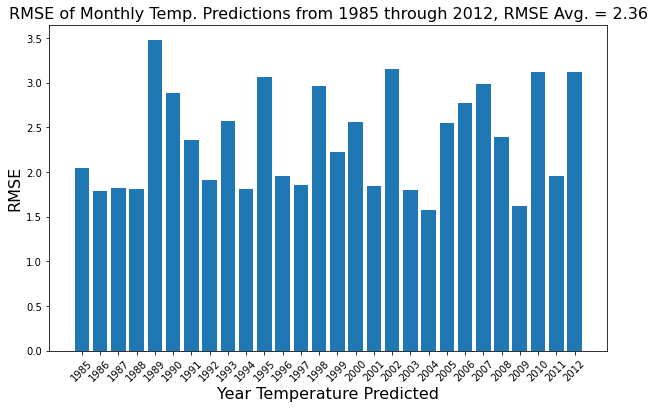

In [112]:
avg_rmse_val = df_val_testing["rmse"].mean()

plt.figure(figsize=(10, 6))  # Set the figure size to (10, 6)
plt.bar(df_val_testing["predict_range"], df_val_testing["rmse"])
plt.xlabel("Year Temperature Predicted", fontsize=16)
plt.ylabel("RMSE", fontsize=16)
avg_rmse_val_formatted = f"RMSE of Monthly Temp. Predictions from 1985 through 2012, RMSE Avg. = {avg_rmse_val:.2f}"
plt.title(avg_rmse_val_formatted, fontsize=16)
plt.xticks(rotation=45)  # Rotate x-axis labels by 45 degrees

plt.show()

# TODO:
* Test trained model on different year
* Figure out why the error is cyclical? Look at how the weights or gradients change overtime...
* Calculate RMSE - add that as a calculation to the training dict
* Make functions for plotting
    * Plot temp +/- uncertainty
* Put date/time on the axis instead of relative time
* Test different activation function (ReLU)